In [50]:
import numpy as np
import pandas as pd

In [54]:
# Loading the datasets 

content_df = pd.read_csv("data/Content.csv" , index_col=None)

reaction_df = pd.read_csv("data/Reactions.csv" , index_col=None)

types_df = pd.read_csv("data/ReactionTypes.csv" , index_col=None)

In [55]:
content_df.head()

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [53]:
reaction_df.head()

,Unnamed: 0,Content ID,Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [42]:
types_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


### Data cleaning

In [43]:
# checking for null and removing rows that have values which are missing

types_df.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [44]:
reaction_df.isna().sum()

Unnamed: 0    0
Content ID    0
Type          0
Datetime      0
dtype: int64

In [45]:
content_df.isna().sum()

Unnamed: 0      0
Content ID      0
Content Type    0
Category        0
dtype: int64

In [46]:
merged_df = pd.merge(reaction_df, content_df, on='Content ID', how='left')



In [47]:
df =  pd.merge(merged_df, types_df, on='Type', how='left')

In [48]:
df.head()

,Unnamed: 0_x,Content ID,Type,Datetime,Unnamed: 0_y,Content Type,Category,Unnamed: 0,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,photo,Studying,2,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,photo,Studying,11,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,photo,Studying,14,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,photo,Studying,2,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,photo,Studying,4,positive,30


In [49]:
df.to_csv("data/clean_data.csv")

In [58]:
clean_data = pd.read_csv("data/clean_data.csv", index_col=None)

In [59]:
clean_data.head()

,Content ID,Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [60]:
# Calculate the total scores for each category
category_scores = clean_data.groupby('Category')['Score'].sum().reset_index()
top_5_categories = category_scores.nlargest(5, 'Score')

In [61]:
# Print the top 5 categories
print(top_5_categories)

          Category  Score
13         animals  71242
20  healthy eating  69067
25      technology  68521
22         science  66549
15         culture  64952


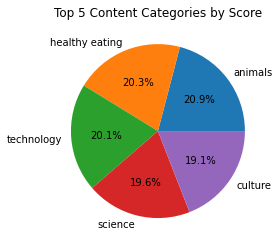

In [62]:
import matplotlib.pyplot as plt

# Group by category and sum the scores
category_scores = clean_data.groupby('Category')['Score'].sum()

# Get the top 5 categories by sum of scores
top_categories = category_scores.nlargest(5)

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
ax.set_title('Top 5 Content Categories by Score')
plt.show()


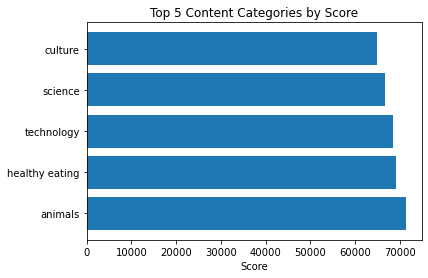

In [63]:
import matplotlib.pyplot as plt

# Group by category and sum the scores
category_scores = clean_data.groupby('Category')['Score'].sum()

# Get the top 5 categories by sum of scores
top_categories = category_scores.nlargest(5)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_categories.index, top_categories.values)
ax.set_xlabel('Score')
ax.set_title('Top 5 Content Categories by Score')
plt.show()


ValueError: Wedge sizes 'x' must be non negative values

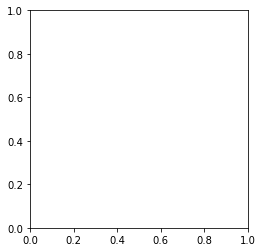

In [64]:
import matplotlib.pyplot as plt

# Get the number of unique categories
num_categories = len(clean_data['Category'].unique())

# Create a donut chart
fig, ax = plt.subplots()
ax.pie([num_categories, 10 - num_categories], labels=['Unique Categories', 'Other'], radius=0.75, wedgeprops={'width': 0.4})
ax.add_artist(plt.Circle((0,0),0.5,color='white'))
ax.set_title('Number of Unique Categories')
plt.show()


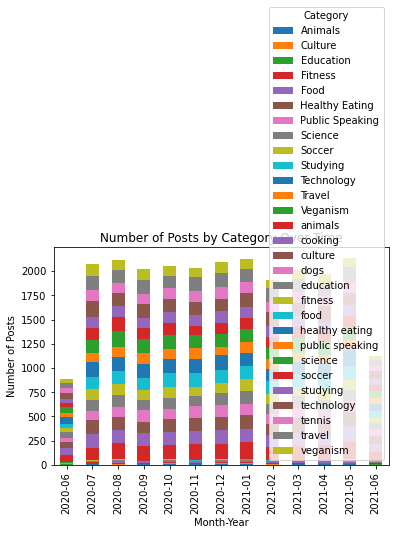

In [65]:
import matplotlib.pyplot as plt

# Convert Datetime column to pandas datetime
clean_data['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new column for month-year
clean_data['MonthYear'] = clean_data['Datetime'].dt.to_period('M')

# Group by month-year and category, and count the number of posts
monthly_posts = clean_data.groupby(['MonthYear', 'Category']).size().unstack()

# Create a stacked bar chart
fig, ax = plt.subplots()
monthly_posts.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Posts')
ax.set_title('Number of Posts by Category Over Time')
plt.show()


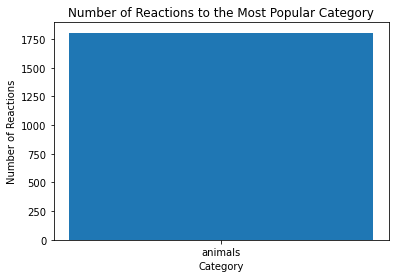

In [66]:
most_popular_category = clean_data.groupby('Category')['Type'].count().sort_values(ascending=False).index[0]
num_reactions = df.loc[df['Category']==most_popular_category, 'Type'].count()

plt.bar(most_popular_category, num_reactions)
plt.title('Number of Reactions to the Most Popular Category')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.show()


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

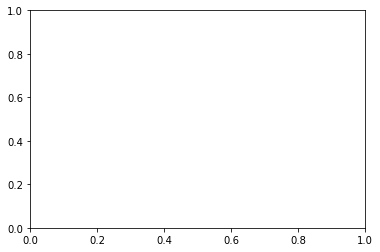

In [67]:
clean_data['Datetime'] = pd.to_datetime(df['Datetime'])
clean_data['Month'] = clean_data['Datetime'].dt.month
clean_data['Year'] = clean_data['Datetime'].dt.year

monthly_posts = clean_data.groupby(['Year', 'Month'])['Content ID'].nunique()

plt.plot(monthly_posts.index.get_level_values(1), monthly_posts.values)
plt.title('Number of Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(range(1, 13))
plt.show()


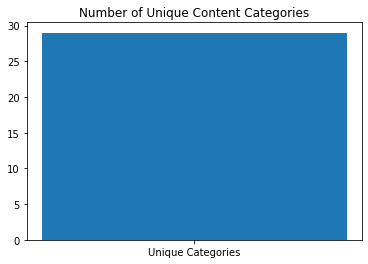

In [68]:
unique_categories = clean_data['Category'].nunique()

plt.bar('Unique Categories', unique_categories)
plt.title('Number of Unique Content Categories')
plt.show()


In [72]:
# Group the data by category and count the number of reactions for each category
category_counts = clean_data.groupby('Category')['Score'].sum()

# Sort the categories in descending order of the reaction count
sorted_categories = category_counts.sort_values(ascending=False)

# Select the category with the highest count as the most popular category
most_popular_category = sorted_categories.index[0]

print(most_popular_category)


animals


In [71]:
import matplotlib.pyplot as plt

plt.bar(most_popular_category.index, most_popular_category['count'])
plt.title('Most Popular Content Category')
plt.xlabel('Content Category')
plt.ylabel('Count')
plt.show()


TypeError: string indices must be integers